# Ejercicio Python de Regresión Logística
Realizaremos un ejercicio de prueba para comprender como funciona este algoritmo

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Cargamos los datos de entrada del archivo csv

In [2]:
dataframe = pd.read_csv("data/usuarios_win_mac_lin.csv")

clases = {
    0: 'Windows',
    1: 'Linux',
    2: 'Mac'
}

dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [3]:
dataframe['clase'].value_counts(normalize=True)

0    0.505882
2    0.258824
1    0.235294
Name: clase, dtype: float64

In [4]:
dataframe.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


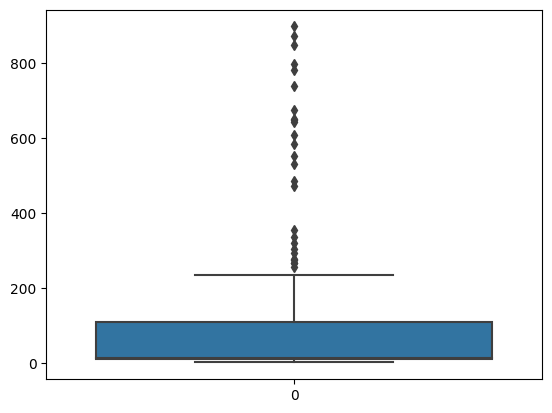

In [7]:
sns.boxplot(dataframe['duracion']);

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duracion  170 non-null    float64
 1   paginas   170 non-null    int64  
 2   acciones  170 non-null    int64  
 3   valor     170 non-null    int64  
 4   clase     170 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 6.8 KB


In [5]:
print(dataframe.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


## Visualizamos los datos

C:\Users\Fernando Carrasco\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


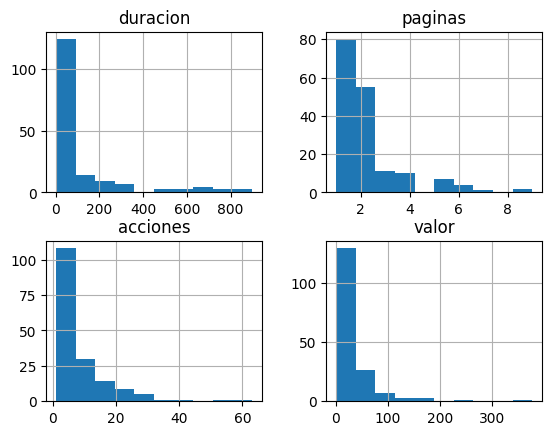

In [8]:
dataframe.drop(['clase'], 1).hist()
plt.show()

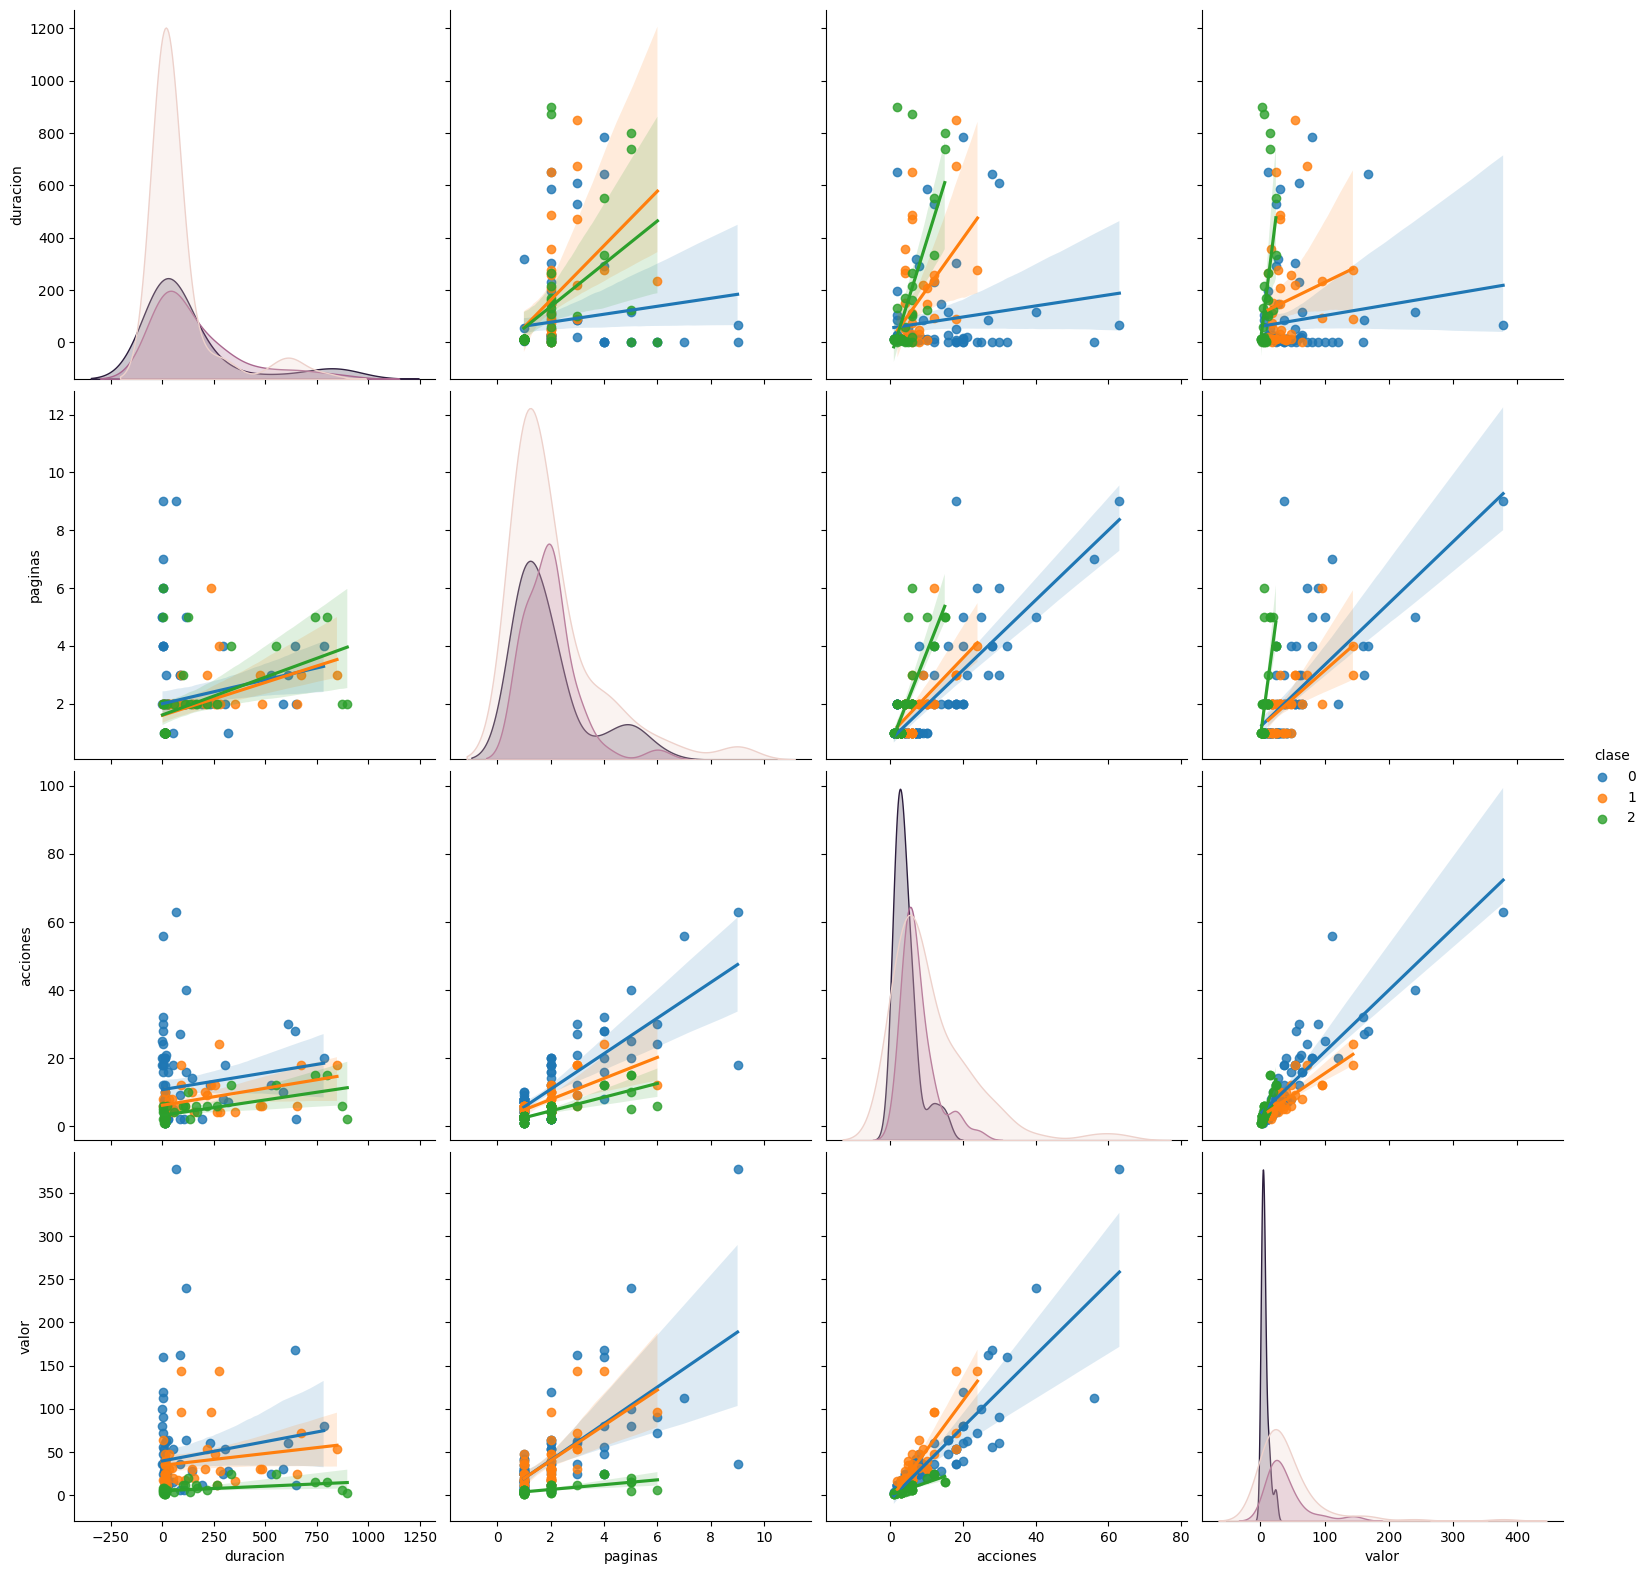

In [9]:
sns.pairplot(dataframe.dropna(),
            hue='clase',
            height=4,
            vars=["duracion", "paginas","acciones","valor"],
            kind='reg'); # "reg" de regresión lineal

## Creamos el modelo

In [10]:
X = np.array(dataframe.drop(['clase'], 1))
y = np.array(dataframe['clase'])

C:\Users\Fernando Carrasco\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

LogisticRegression(max_iter=1000)

In [13]:
predictions = model.predict(X)
print(predictions)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 2 2
 2 2 2 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 2 0
 0 1 1 1 0 0 0 0 0 0 0 0 2 1 0 0 0 0 1 0 0 2 0 2 1 0 0 0 0 0 0 0 0 0 0 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0]


In [14]:
predicions_proba = model.predict_proba(X)
print(np.round(np.array(predicions_proba), 2))

[[0.22 0.09 0.68]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.18 0.08 0.74]
 [0.28 0.1  0.62]
 [0.27 0.08 0.65]
 [0.05 0.05 0.91]
 [0.22 0.09 0.69]
 [0.09 0.06 0.84]
 [0.   0.   1.  ]
 [0.12 0.07 0.8 ]
 [0.32 0.09 0.6 ]
 [0.1  0.06 0.84]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.23 0.09 0.68]
 [0.   0.   1.  ]
 [0.65 0.34 0.01]
 [0.58 0.42 0.  ]
 [0.73 0.27 0.  ]
 [0.71 0.29 0.  ]
 [0.32 0.68 0.  ]
 [0.82 0.18 0.  ]
 [0.46 0.54 0.  ]
 [0.78 0.22 0.  ]
 [0.37 0.63 0.  ]
 [0.09 0.91 0.  ]
 [0.73 0.27 0.  ]
 [0.45 0.52 0.03]
 [0.5  0.5  0.  ]
 [0.35 0.65 0.  ]
 [0.22 0.78 0.  ]
 [0.26 0.74 0.  ]
 [0.22 0.78 0.  ]
 [0.64 0.36 0.  ]
 [0.01 0.   0.99]
 [0.03 0.02 0.95]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.81 0.19 0.  ]
 [0.61 0.39 0.  ]
 [0.54 0.46 0.  ]
 [0.23 0.77 0.  ]
 [0.68 0.32 0.  ]
 [0.28 0.72 0.  ]
 [0.57 0.43 0.  ]
 [0.41 0.59 0.  ]
 [0.76 0.24 0.  ]
 [0.99 0.01 0.  ]
 [0.77 0.23 0.  ]
 [0.78 0.22 0.  ]
 [0.97 0.03 0.  ]
 [0.99 0.01 0.  ]
 [0.91 0.09 0.  ]
 [0.98 0.0

In [15]:
model.score(X, y)

0.7764705882352941

In [16]:
model.classes_

array([0, 1, 2], dtype=int64)

# Validación del Modelo

In [ ]:
validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,
                                                                    y,
                                                                    test_size=validation_size,
                                                                    random_state=seed)

In [ ]:
# name='Logistic Regression'
# kfold = model_selection.KFold(n_splits=10) #Parte los datos en 10 trozos para usar validación cruzada / cross validation
# cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')

# msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
# print(cv_results)
# print(msg)

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

In [ ]:
predictions = model.predict(X_test)
print(accuracy_score(Y_test, predictions))

In [ ]:
acierto = accuracy_score(Y_test, predictions)

error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")

## Resultados

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
c_matrix = confusion_matrix(Y_test, predictions)

In [ ]:
print(c_matrix)

In [ ]:
import seaborn as sns
sns.heatmap(c_matrix, annot=True);

In [ ]:
sns.heatmap(confusion_matrix(Y_test, predictions, normalize='true'), annot=True, 
            fmt='.2%', cmap='Blues');

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, precision_score, recall_score, f1_score

multilabel_confusion_matrix(Y_test, predictions)

[Nice confusion matrix catalog visuals examples](https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea)

# Clasificación de nuevos registros

In [ ]:
X_new = pd.DataFrame({'duracion': [8],
                     'paginas': [5],
                     'acciones': [5],
                     'valor': [2]})
X_new

In [ ]:
X_new.values

In [ ]:
model.predict(X_new.values)

### Ejercicio: ¿Cómo sacamos la predicción del nuevo valor?